In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

print(df.head())

print(df.isnull().sum())

print(df.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
df = df[['LotArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].dropna()

print(df.isnull().sum())

LotArea         0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64


RMSE: 69510.14107197429


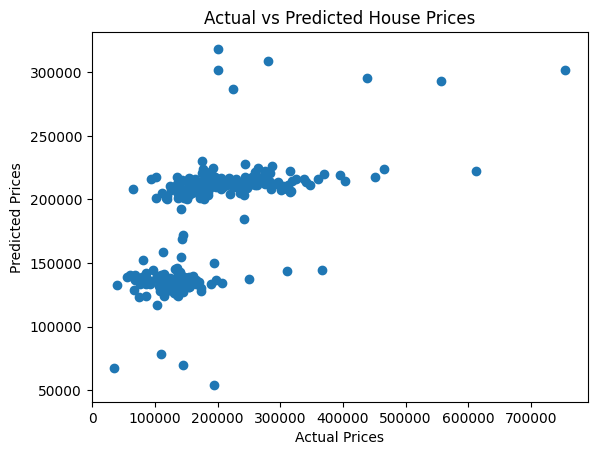

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

x = df[['LotArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [7]:
import joblib

joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']

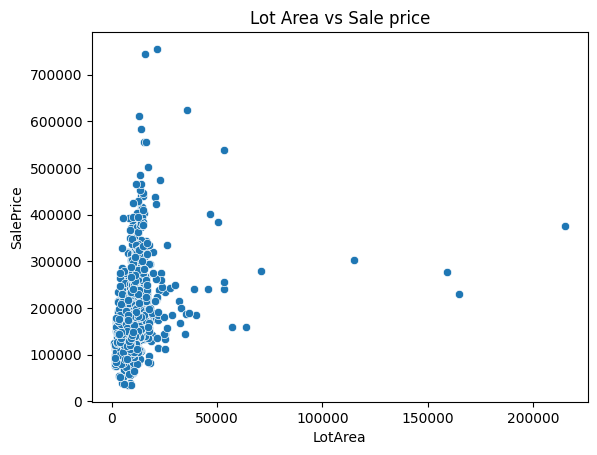

In [8]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Lot Area vs Sale price')
plt.show()